In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\HP\Desktop\Crop_recommendation.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2196.000000,2198.000000,2198.000000,2194.000000
mean,50.551818,53.362727,48.149091,25.622419,71.471781,6.469221,103.314830
std,36.917334,32.985883,50.647931,5.065486,22.269918,0.774242,54.889414
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.770662,60.248775,5.971452,64.468457
50%,37.000000,51.000000,32.000000,25.605637,80.473146,6.424285,94.762562
75%,84.250000,68.000000,49.000000,28.563593,89.936402,6.923909,123.636582
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2196 non-null   float64
 4   humidity     2198 non-null   float64
 5   ph           2198 non-null   float64
 6   rainfall     2194 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    4
humidity       2
ph             2
rainfall       6
label          0
dtype: int64

In [9]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

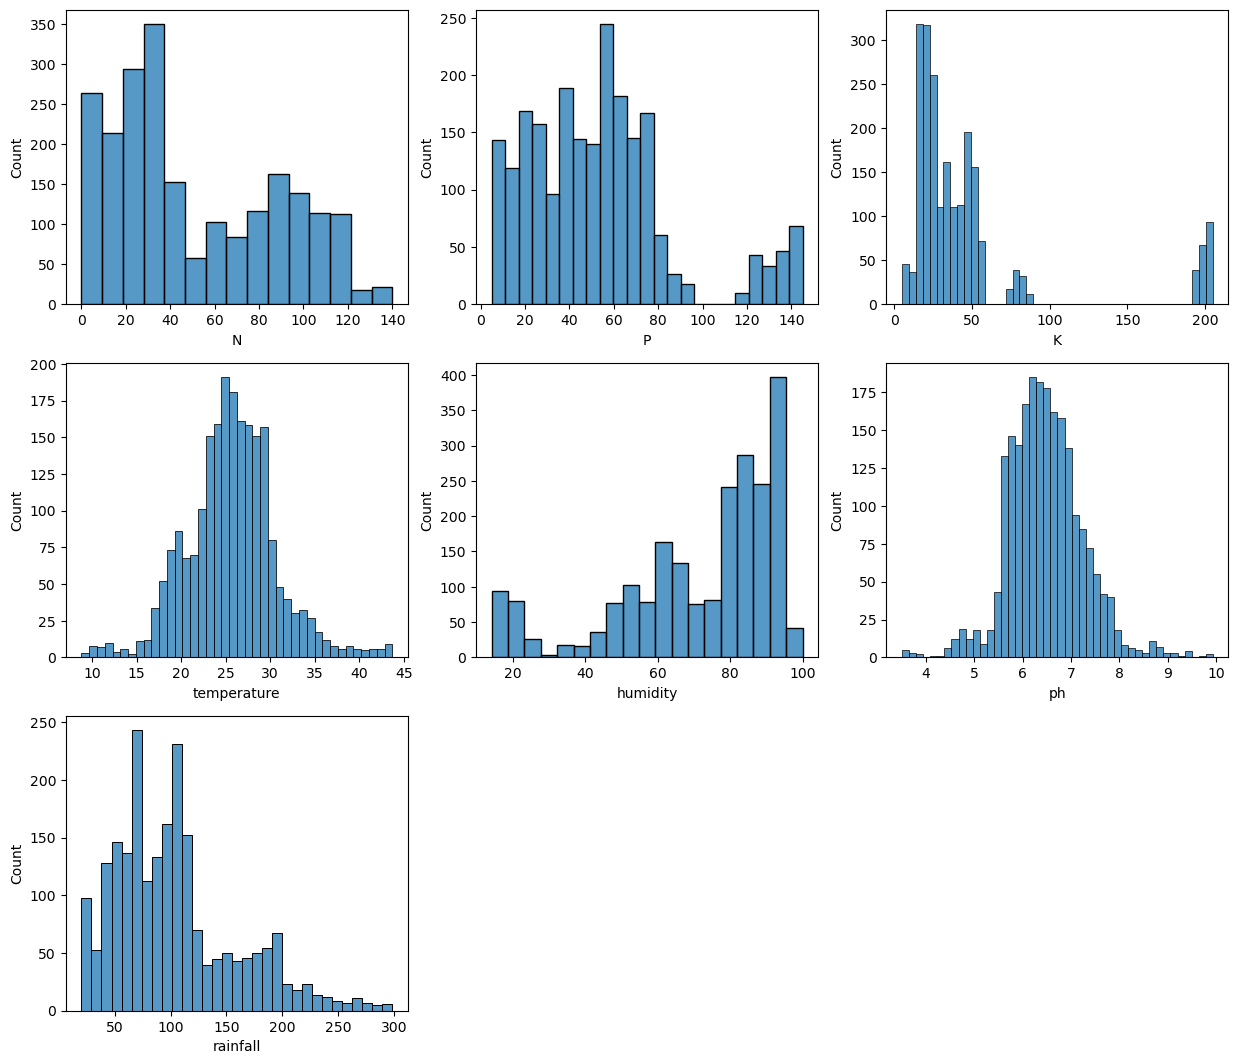

In [10]:
all_columns=data.columns[:-1]

plt.figure(figsize=(15,13))
i=1

for column in all_columns:
        plt.subplot(3,3,i)
        sns.histplot(data[column])
        i+=1
        
plt.show()

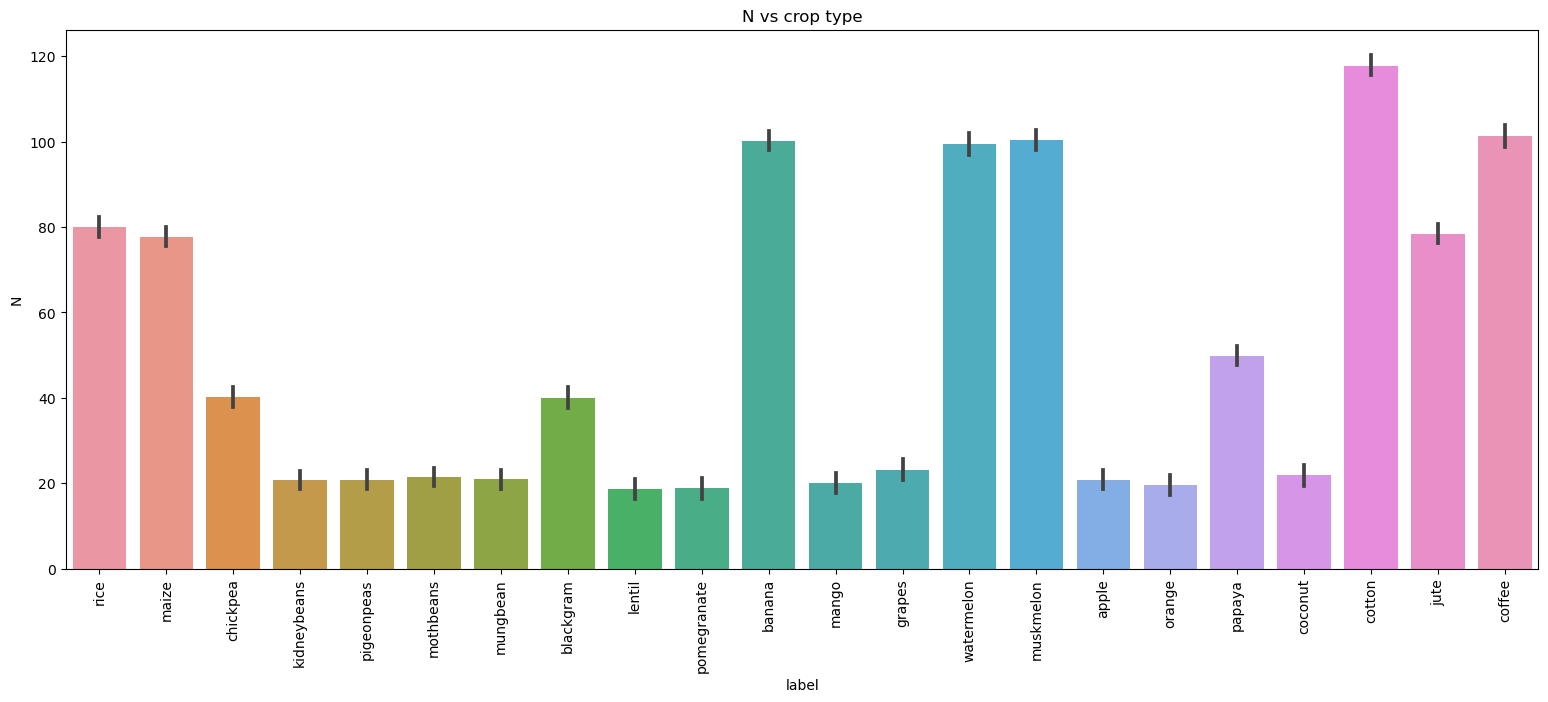

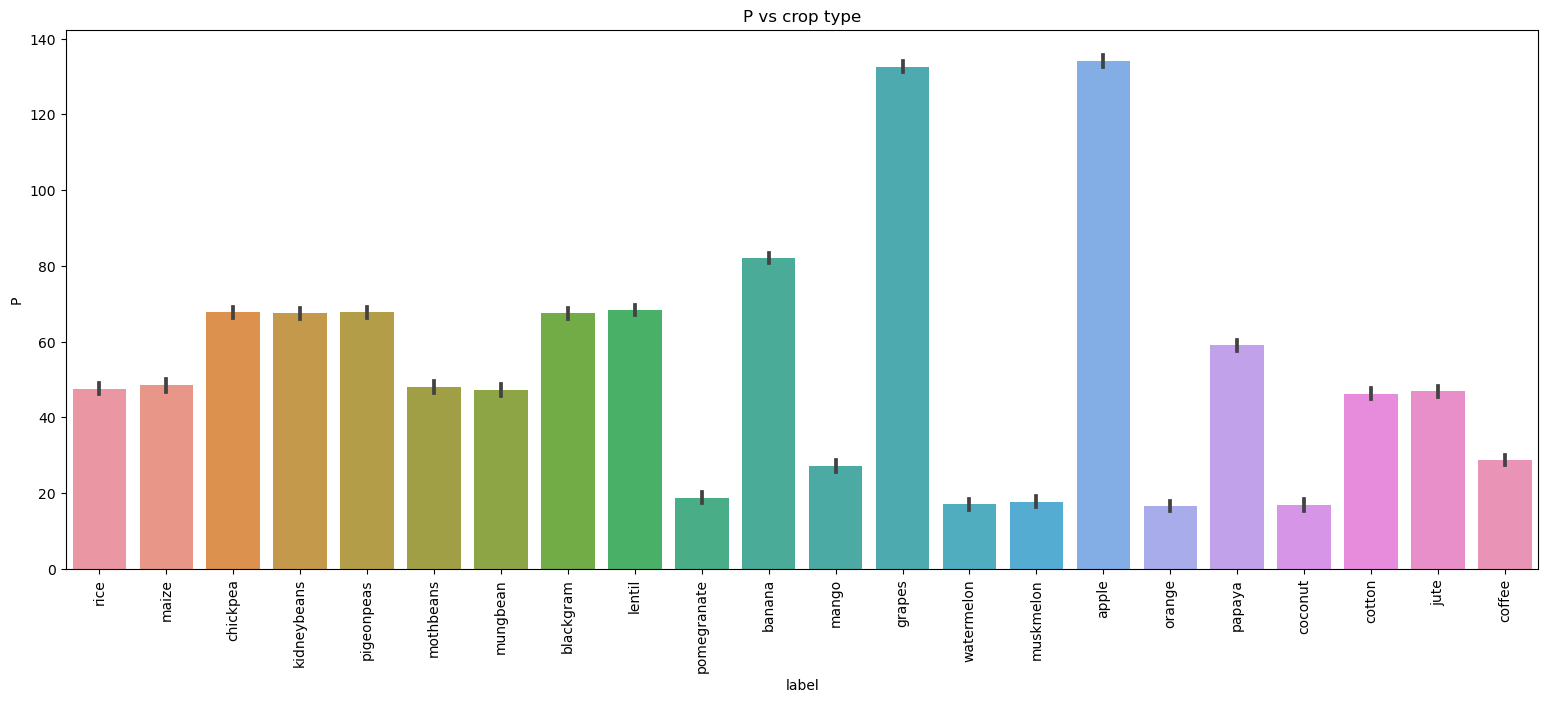

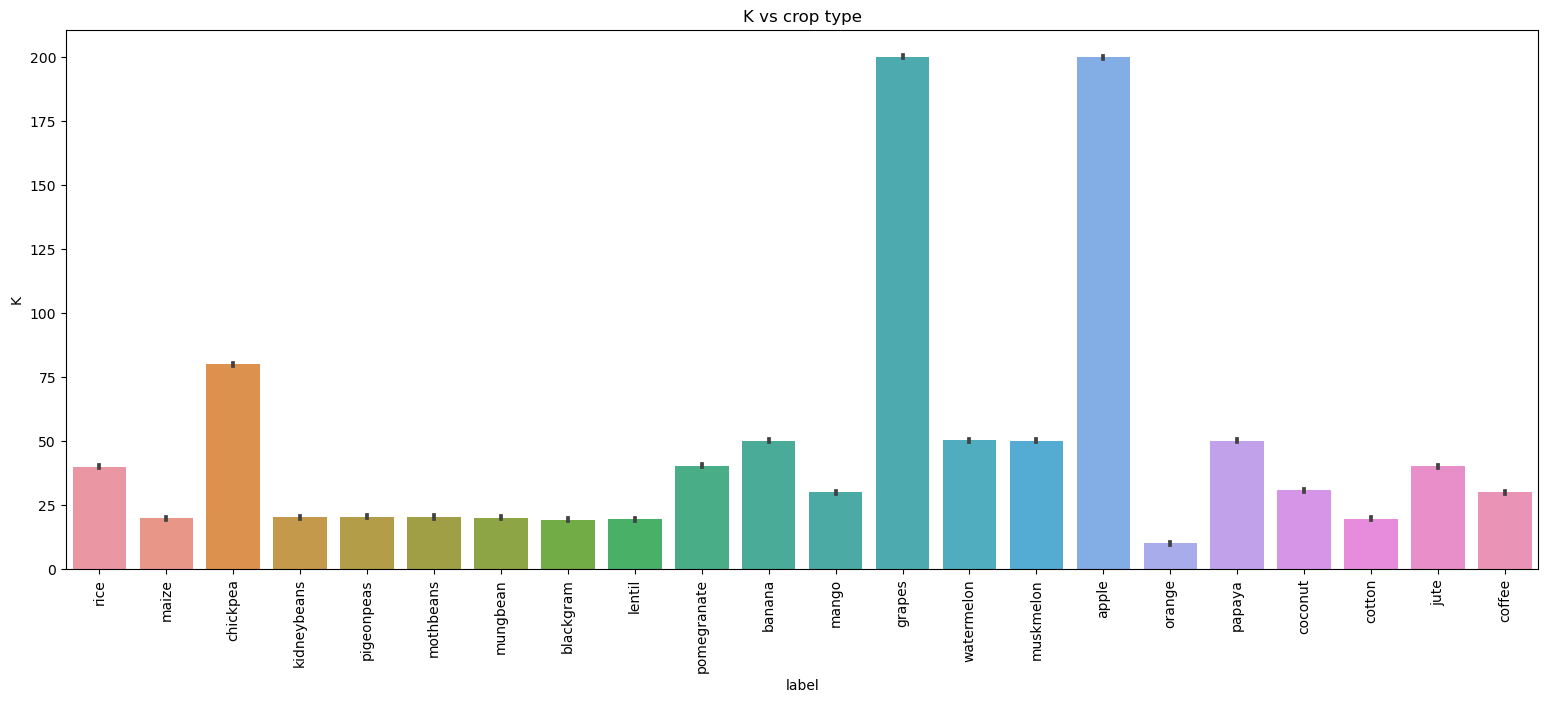

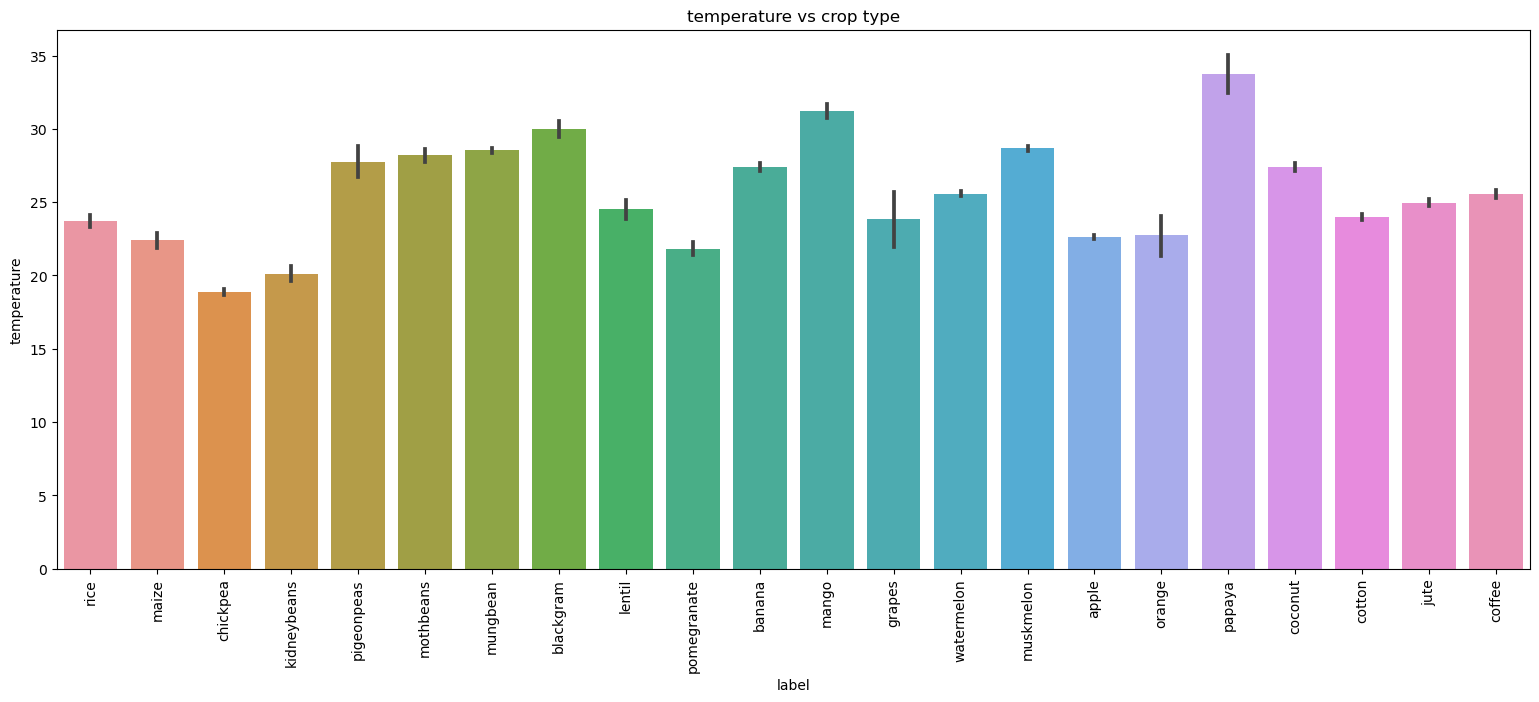

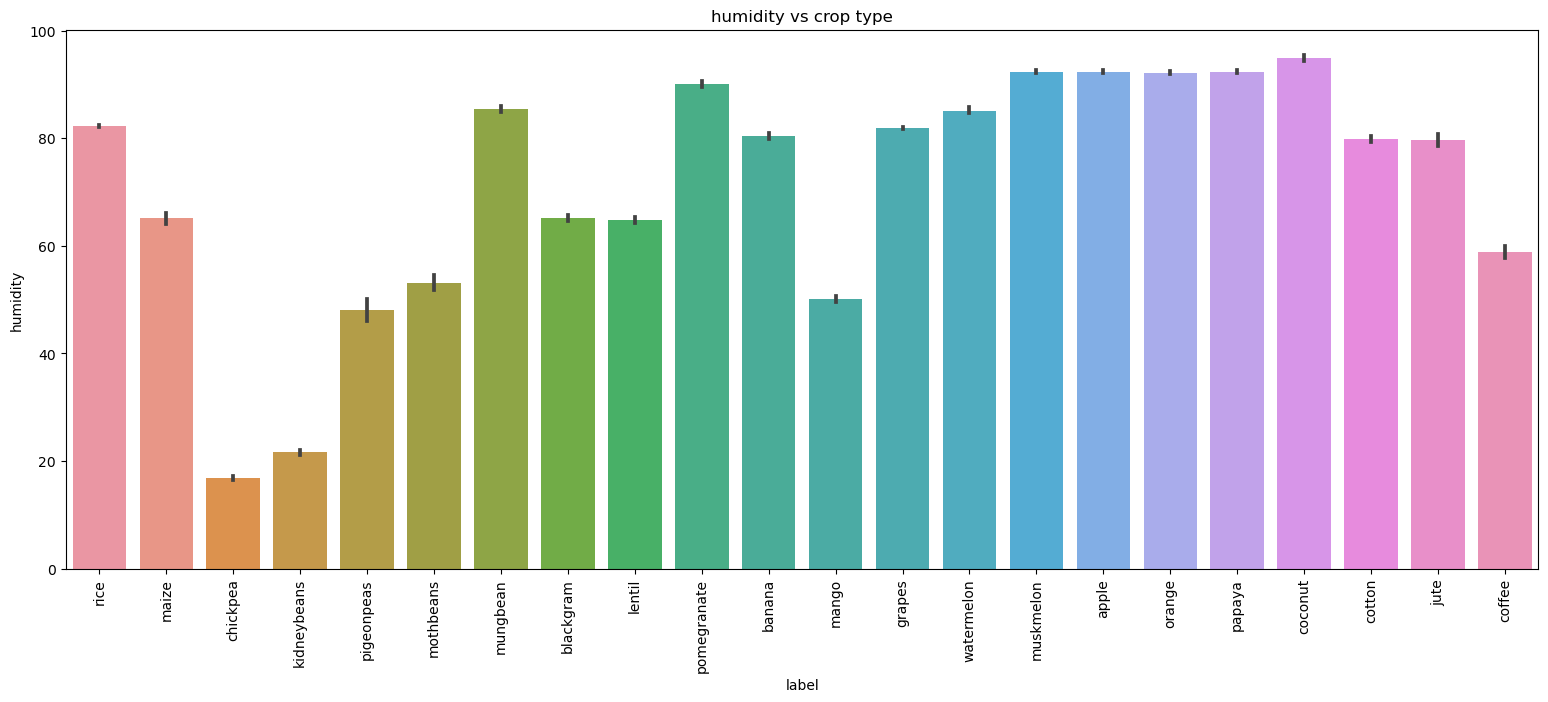

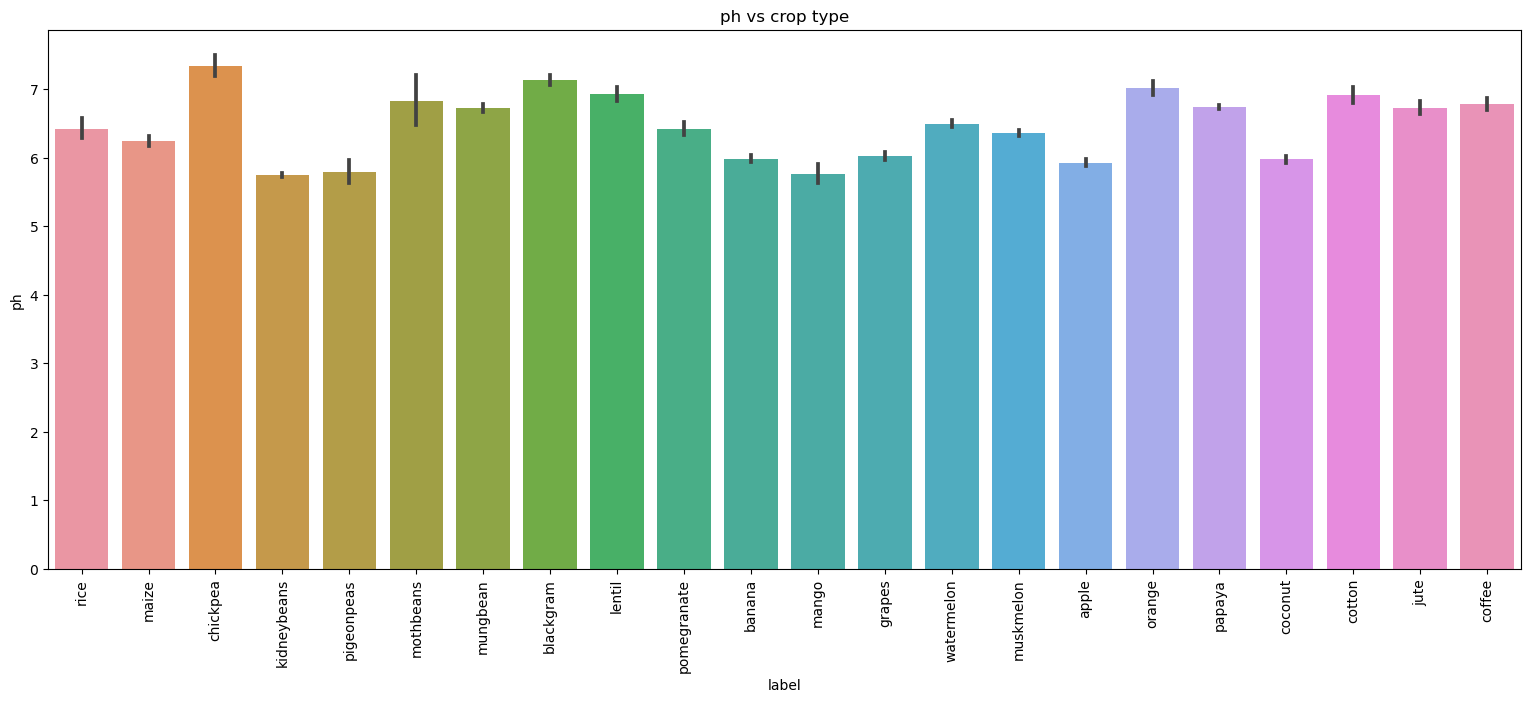

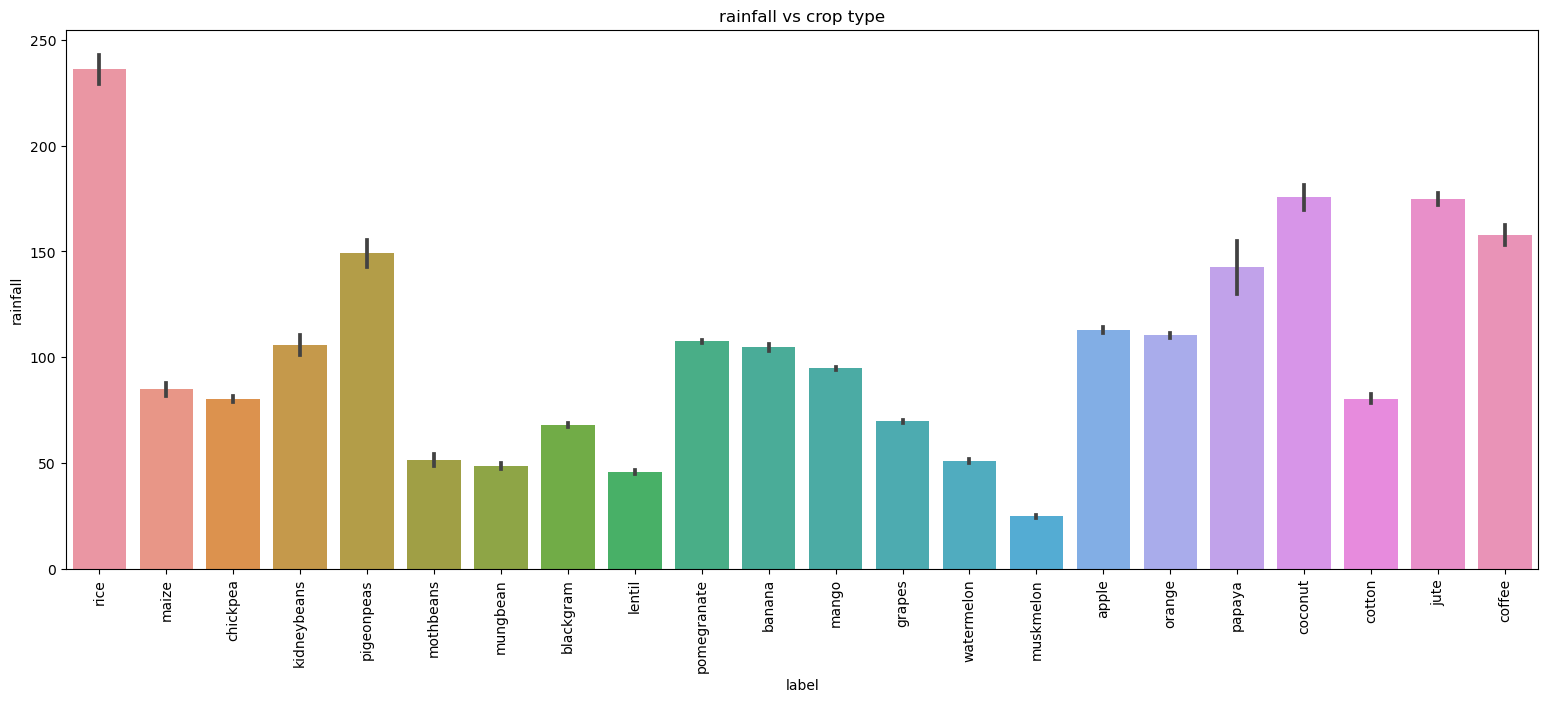

In [11]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x='label', y= column, data=data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs crop type")
    plt.show()
    

<AxesSubplot:xlabel='ph', ylabel='temperature'>

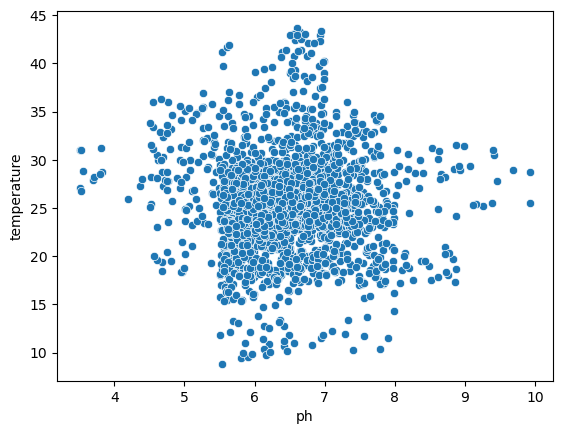

In [12]:
sns.scatterplot(x='ph',y='temperature', data=data)

<AxesSubplot:xlabel='ph', ylabel='Count'>

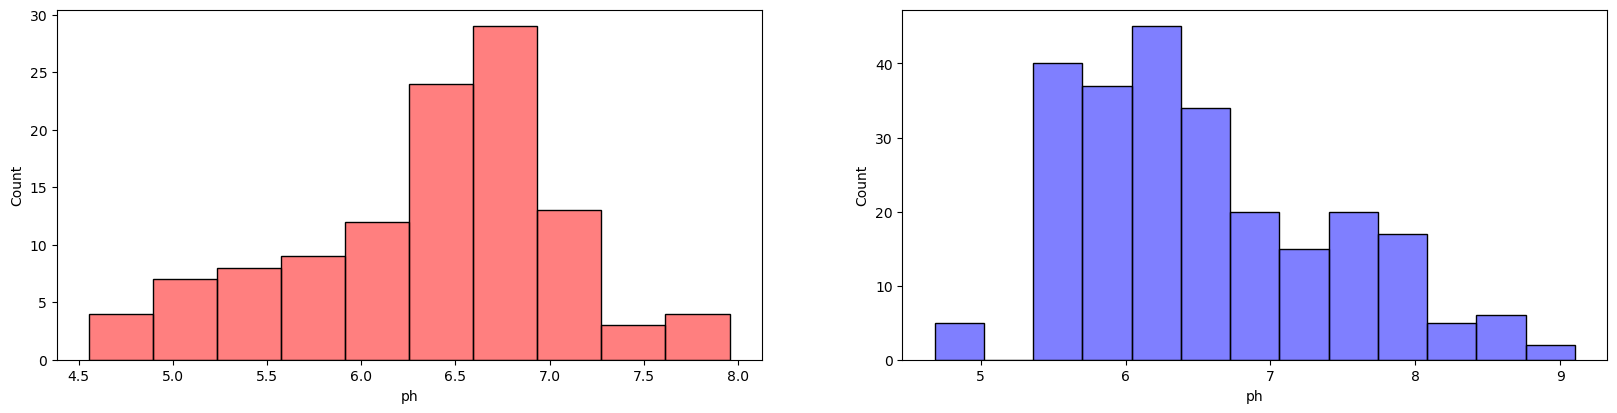

In [13]:
high_temp= data.query('temperature>34')
low_temp= data.query('temperature<19.5')
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(high_temp.ph, binwidth=.34, color='red', alpha=0.5)
plt.subplot(2,2,2)
sns.histplot(low_temp.ph, binwidth=.34,color='blue',alpha=0.5)

<AxesSubplot:>

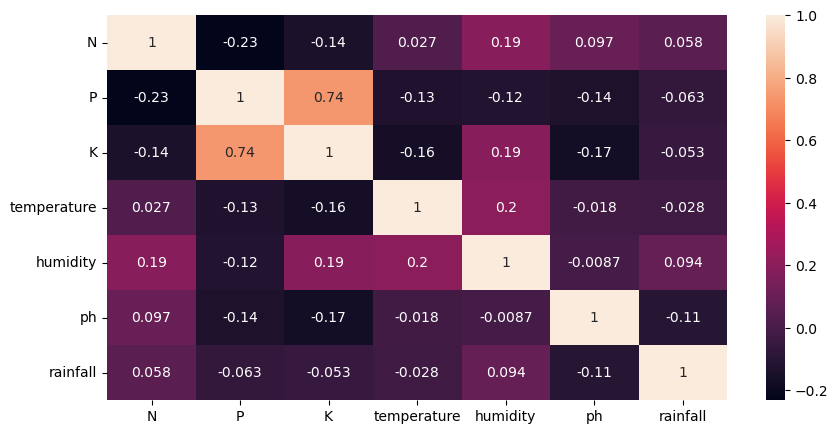

In [14]:
corr=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [15]:
data.isna().sum()

N              0
P              0
K              0
temperature    4
humidity       2
ph             2
rainfall       6
label          0
dtype: int64

In [16]:
for i in ['temperature','ph']:
    data[i]=data[i].fillna(data[i].mean())

In [17]:
for i in ['humidity','rainfall']:
    data[i]=data[i].fillna(data[i].median())

In [18]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [20]:
label_dict={}
for i in range(22):
    label_dict[i]=le.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [21]:
x=data.drop('label',axis=1)
y=data['label']

In [22]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [23]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model_log= LogisticRegression()

In [26]:
params={
    'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','liblinear','sag'],
    'max_iter': [300,1000,2500]
    
    
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rand= RandomizedSearchCV(model_log, param_distributions= params,scoring='accuracy',n_jobs=4,cv=5,verbose=5, random_state=2)

In [28]:
rand.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [300, 1000, 2500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag']},
                   random_state=2, scoring='accuracy', verbose=5)

In [29]:
rand.best_estimator_

LogisticRegression(C=1438.44988828766, max_iter=1000, penalty='none',
                   solver='newton-cg')

In [30]:
rand.best_score_

0.9795454545454545

In [31]:
log_model= LogisticRegression(solver ='newton-cg', penalty='none', max_iter= 1000,C= 1438.44988828766)

In [32]:
log_model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=1438.44988828766, max_iter=1000, penalty='none',
                   solver='newton-cg')

In [33]:
y_predlog=log_model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       0.95      1.00      0.97        18
           8       0.83      0.86      0.84        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [35]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(log_model,x,y,cv=5)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [36]:
score.mean()

0.9772727272727273

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
metric_k= []
neighbors = np.arange(3, 10)

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model2=knn.fit(x_train,y_train)
    y_pred_knn=model2.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

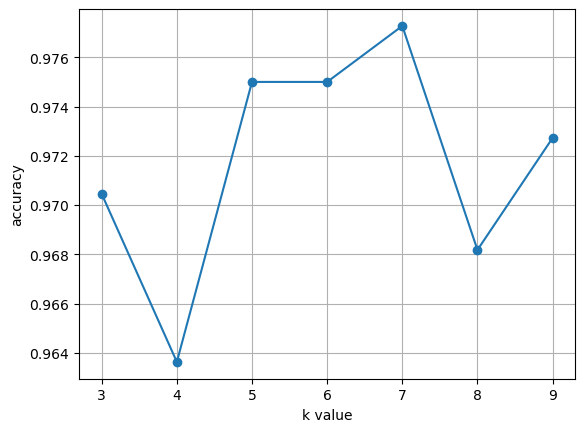

In [38]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=7)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
model_knn.score(x_test,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9772727272727273

In [41]:
y_predknn=model_knn.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.89      0.89        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [43]:
score= cross_val_score(model_knn,x,y,cv=5)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [44]:
score.mean()

0.9768181818181819

## SVM 

In [45]:
from sklearn.svm import SVC
model_svm=SVC()
params_svm=[{'C':[1,10,100,1000], 'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

In [46]:
rand_svm= RandomizedSearchCV(model_svm, param_distributions= params_svm,scoring='accuracy',n_jobs=-1,cv=5,verbose=5,n_iter=50, random_state=2)
rand_svm.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']},
                                        {'C': [1, 10, 100, 1000],
                                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7, 0.8, 0.9],
                                         'kernel': ['rbf']}],
                   random_state=2, scoring='accuracy', verbose=5)

In [47]:
rand_svm.best_score_

0.9863636363636363

In [48]:
rand_svm.best_estimator_

SVC(C=1000, kernel='linear')

In [49]:
model_svm1=SVC(kernel ='linear', C= 1000)

In [50]:
model_svm1.fit(x_train,y_train)
y_predsvm= model_svm1.predict(x_test)

In [51]:
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.86      0.86      0.86        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [52]:
score= cross_val_score(model_svm1,x,y,cv=5)

In [53]:
score.mean()

0.9813636363636362

## Deicision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
params_dtree={
       'max_features':['auto','sqrt','log2'],
       'max_depth': [10,20,30,50,70,100],
       'min_samples_split':[2,3,5],
       'min_samples_leaf':[2,4,6,8,10]
       }

In [55]:
rand_dtree= RandomizedSearchCV(model_dtree, param_distributions= params_dtree,scoring='accuracy',n_jobs=-1,cv=5,verbose=5,n_iter=50, random_state=4)
rand_dtree.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 50, 70, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 3, 5]},
                   random_state=4, scoring='accuracy', verbose=5)

In [56]:
rand_dtree.best_estimator_

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2)

In [57]:
rand_dtree.best_score_

0.9670454545454545

In [58]:
model_dtree1=DecisionTreeClassifier(max_depth=30, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
model_dtree1.fit(x_train,y_train)
y_preddtree= model_dtree1.predict(x_test)

In [59]:
print(classification_report(y_test,y_preddtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.75      0.94      0.83        16
           3       1.00      0.95      0.98        21
           4       0.95      1.00      0.98        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.90      0.83      0.86        23
          11       1.00      0.81      0.89        21
          12       0.96      1.00      0.98        26
          13       0.78      0.74      0.76        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      0.97      0.98        29
          17       0.95    

In [60]:
score= cross_val_score(model_dtree1,x,y,cv=5)

In [61]:
score.mean()

0.9586363636363636

## Random Forest 

In [62]:
params_rfest={'n_estimators':[ int(x) for x in np.linspace(start=20,stop=100,num=10)],
       'max_features':['auto','sqrt','log2'],
       'max_depth': [3,5,10,20,30],
       'min_samples_split':[1,2,3,5,7,9],
       'min_samples_leaf':[1,2,4,6,8]
       }

In [63]:
from sklearn.ensemble import RandomForestClassifier
model_rfest=RandomForestClassifier()

In [64]:
rand_rfest= RandomizedSearchCV(model_rfest, param_distributions= params_rfest,scoring='accuracy',n_jobs=-1,cv=5,verbose=5,n_iter=50, random_state=2)
rand_rfest.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 5, 7, 9],
                                        'n_estimators': [20, 28, 37, 46, 55, 64,
                                                         73, 82, 91, 100]},
                   random_state=2, scoring='accuracy', verbose=5)

In [65]:
rand_rfest.best_params_

{'n_estimators': 28,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [66]:
rand_rfest.best_score_

0.9954545454545455

In [67]:
model_rfest1=RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,n_estimators=28)
model_rfest1.fit(x_train,y_train)
y_predrfest= model_rfest1.predict(x_test)

In [68]:
print(classification_report(y_test,y_predrfest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [69]:
score= cross_val_score(model_rfest1,x,y,cv=5)

In [70]:
score.mean()

0.9918181818181818

## XGBOOST

In [71]:
import xgboost as xgb

params_xgb={
    'n_estimators':[100,300,900,1100,1500],
    'max_depth':[2,3,5,10,25],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'booster':['gbtree','gblinear'],
    'min_child_weight':[1,2,3,4,5]
}
model_xgboost=xgb.XGBClassifier()

In [72]:
rand_xgboost= RandomizedSearchCV(model_xgboost, param_distributions= params_xgb,scoring='accuracy',n_jobs=-1,cv=5,verbose=5,n_iter=50, random_state=2)
rand_xgboost.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [73]:
rand_xgboost.best_params_

{'n_estimators': 900,
 'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.1,
 'booster': 'gbtree'}

In [74]:
rand_xgboost.best_score_

0.9926136363636363

In [75]:
model_xgb1=xgb.XGBClassifier(n_estimators= 900,min_child_weight= 3,max_depth= 2, learning_rate= 0.1,booster= 'gbtree')
model_xgb1.fit(x_train,y_train)
y_predxgb= model_xgb1.predict(x_test)

In [76]:
print(classification_report(y_test,y_predxgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.93      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [77]:
score= cross_val_score(model_xgb1,x,y,cv=5)

In [78]:
score.mean()

0.9904545454545455

In [82]:
report = {'Model': ['Logistic Regressio', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBOOST'], 
          
        'Accuracy Score': [accuracy_score(y_test, y_predlog),accuracy_score(y_test, y_predknn),accuracy_score(y_test, y_predsvm),
                accuracy_score(y_test, y_preddtree),accuracy_score(y_test, y_predrfest),accuracy_score(y_test, y_predxgb),],  
          
        'CV Score': [0.9772727272727273,0.9768181818181819,0.9813636363636362,0.949090909090909,0.9945454545454545,
                     0.9904545454545455]}
        
model_report=pd.DataFrame(report)
model_report

,Model,Accuracy Score,CV Score
0,Logistic Regressio,0.972727,0.977273
1,KNN,0.977273,0.976818
2,SVM,0.977273,0.981364
3,Decision Tree,0.945455,0.949091
4,Random Forest,0.990909,0.994545
5,XGBOOST,0.990909,0.990455


In [80]:
import pickle
pickle.dump(model_rfest1,open('model.pkl','wb'))


In [81]:
print(model_rfest1.predict([[104, 18, 30, 23.603016, 60.3,6.7, 140.91]])[0])

5


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
